In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


import os
os.chdir("/Volumes/RaMain/LabNotebooks_Raeuf/PhD Project/PhDThesis/Scientific_Reports/Paper_AfterReviews/AML_classification_training_and_testing")



In [2]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict


In [3]:
read_dependent_file = pd.read_csv("2761_Dependent_Data_Subjects_with_Disease_State_AML_or_Healthy_Info_Corrected_for_All_Factors_Datasetwise_2213_AML_1st_548_Healthy_2nd_with_974_AML_probsets_predictors.csv", index_col = [0]).transpose() 


In [4]:
print(read_dependent_file.shape)
read_dependent_file.head()

(2761, 974)


,200602_at,200722_s_at,200782_at,200832_s_at,200946_x_at,200974_at,200983_x_at,200986_at,200998_s_at,201015_s_at,...,242888_at,243001_at,243092_at,243384_at,243706_at,243797_at,244030_at,244043_at,244297_at,37079_at
GSM259087,1.297539,1.392409,1.027064,0.111663,1.483360,1.449332,1.092168,1.051632,0.393156,1.148478,...,-0.774488,-0.867879,0.619717,-1.187252,-0.776018,0.641581,-0.134870,0.194044,-0.456224,-0.112474
GSM259088,-1.378910,1.424218,1.192688,-0.189030,1.472979,1.296810,1.998511,1.453404,0.880878,0.738508,...,-0.190250,-0.945929,0.177261,-1.125785,-0.778146,0.900601,-0.751019,0.858652,-0.025243,-0.723126
GSM259089,0.924651,1.382827,1.511259,0.958691,1.452452,0.534820,1.406378,1.009450,0.736137,1.239491,...,-0.643756,-0.933845,-0.091583,-0.888849,-0.574294,0.733291,-0.525242,0.158801,-0.148560,-0.301435
GSM259090,0.824415,1.282069,0.015030,0.145804,1.317093,1.005495,0.498802,-0.004537,0.091547,1.226556,...,-0.718261,-0.659499,0.952519,-1.081747,-0.640571,0.786002,-0.572304,-0.349141,-0.511744,-0.274177
GSM259091,0.934866,1.396415,1.014507,-0.076499,1.460708,1.163035,1.480175,0.979271,0.597280,0.986748,...,-0.667744,-0.738587,0.203649,-1.144351,-0.605030,0.863905,-0.462335,-0.139304,-0.245095,-0.614119


In [5]:
read_target_file = pd.read_csv("2761_Target_Data_For_Dependent_Data_Subjects_with_Disease_State_AML_or_Healthy_Info_Corrected_for_All_Factors_Datasetwise_2213_AML_1st_548_Healthy_2nd_with_974_AML_probsets_predictors.csv", index_col = [0])


In [6]:
print(read_target_file.shape)
read_target_file.head()

(2761, 1)


,target
ID_REF,
GSM259087,0
GSM259088,0
GSM259089,0
GSM259090,0
GSM259091,0


In [7]:
y = read_target_file["target"].values


In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
y.shape

(2761,)

In [10]:
selected_classifier = KNeighborsClassifier(n_neighbors = 30,
                                           weights = "uniform",
                                           algorithm = "auto",
                                           leaf_size = 30,
                                           p = 4,
                                           metric = "minkowski",
                                           metric_params = None,
                                           n_jobs = 1)

In [11]:
scores = cross_val_score (selected_classifier,
                          read_dependent_file,
                          y,
                          cv = 10,
                          scoring="accuracy")

In [12]:
scores


array([0.99638989, 0.98194946, 1.        , 0.98550725, 0.94927536,
       0.95289855, 1.        , 0.98550725, 0.97454545, 0.96727273])

In [13]:
"%s %0.2f%s (+/- %0.2f)" % ("Classification Accuracy: ", scores.mean()*100, "%", scores.std())



'Classification Accuracy:  97.93% (+/- 0.02)'

In [17]:
leaf_size_range = range(1, 5)
k_scores = []
k_st = []

for l in leaf_size_range:
    knn_classifier = KNeighborsClassifier(n_neighbors = 5,
                                           weights = "uniform",
                                           algorithm = "auto",
                                           leaf_size = 1,
                                           p = l,
                                           metric = "minkowski",
                                           metric_params = None,
                                           n_jobs = 1)
    scores = cross_val_score (knn_classifier,
                          read_dependent_file,
                          y,
                          cv = 10,
                          scoring="accuracy")
    scores_percent = scores.mean()*100
    k_scores.append(scores_percent)
    k_st.append(scores.std())
    print(l, scores_percent, scores.std())

1 99.67391304347825 0.00750446202072753
2 99.347561631065 0.008069462932553586
3 98.83978729375058 0.011206393551192535
4 98.44097116194119 0.014047991219857862


In [18]:
print(k_scores)
print(len(k_scores))

[99.67391304347825, 99.347561631065, 98.83978729375058, 98.44097116194119]
4


In [19]:
print(k_st)
print(len(k_st))

[0.00750446202072753, 0.008069462932553586, 0.011206393551192535, 0.014047991219857862]
4


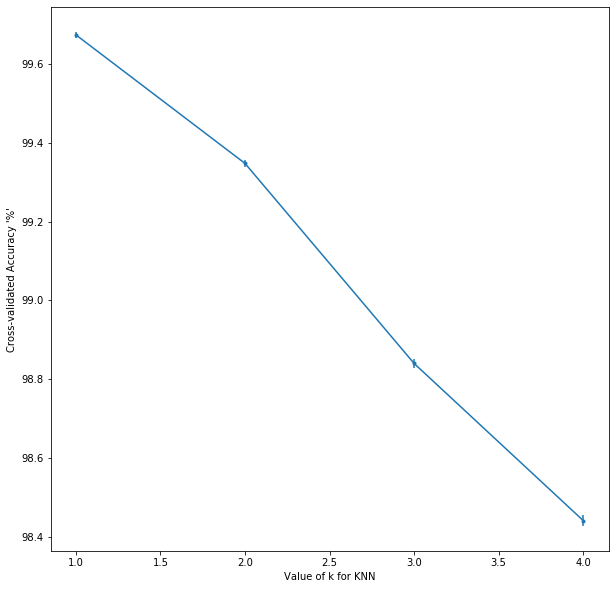

In [20]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 10  
fig_size[1] = 10

plt.errorbar(range(1,5), k_scores, k_st, marker='.')
plt.xlabel("Value of k for KNN")
plt.ylabel("Cross-validated Accuracy '%'")


plt.show()

In [50]:
predict = cross_val_predict (selected_classifier,
                          read_dependent_file,
                          y,
                          cv = 10)


In [51]:
predict

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
accuracy = metrics.accuracy_score(y, predict) 



In [53]:
accuracy

0.980441868888084

In [54]:
confusion_matrix_result_matrix2 = confusion_matrix(y,predict)

In [55]:
confusion_matrix_result_matrix2

array([[2160,   53],
       [   1,  547]])

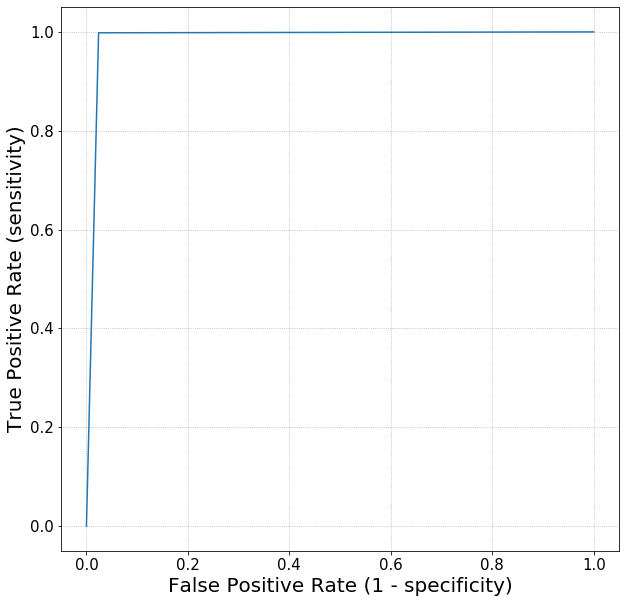

In [56]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 10  
fig_size[1] = 10




fpr, tpr, thresholds = metrics.roc_curve(y, predict)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - specificity)',fontsize=20)
plt.ylabel('True Positive Rate (sensitivity)',fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# plt.title('ROC curve for AML KNN-classifier')
plt.grid(linestyle='dotted')




title = "ROC curve for AML KNN-classifier.png"


plt.savefig(title,bbox_inches='tight')
plt.show() 


img = Image.open(title)
title1 = title.split(".")[0]
img.save(title+'.tiff')
os.remove(title)

In [57]:
tpr.shape

(3,)

In [58]:
auc_score = metrics.roc_auc_score(y, predict)



In [59]:
auc_score

0.9871128962566915